## Modeling and Model Tuning:

### Import Libraries:

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Read in Data:

In [32]:
# Read in clean_engineered training data

df_train = pd.read_csv('../datasets/train_cleaned_engineered.csv')

In [33]:
# Read in clean_engineered test data test

df_test = pd.read_csv('../datasets/test_cleaned_engineered.csv')

### Set up X and Y:

In [34]:
# Set up X and y:

X_train = df_train[['Sq Ft Total','Overall Qual','Lot Frontage',
                    'Home Age', 'Yrs Since Remod','Has Fence',
                    'Has Wood Deck','Has Masonry',
                   'Has Fireplace', 'Has Garage', 'Has Pool',
                    'Exter Qual', 'Exter Cond','Bsmt Cond',
                    'Bsmt Qual', 'Kitchen Qual'
                   ]]

y_train = df_train['log_SalePrice']
     
X_test = df_test[['Sq Ft Total','Overall Qual','Lot Frontage',
                    'Home Age', 'Yrs Since Remod','Has Fence',
                    'Has Wood Deck','Has Masonry',
                   'Has Fireplace', 'Has Garage', 'Has Pool',
                    'Exter Qual', 'Exter Cond','Bsmt Cond',
                    'Bsmt Qual', 'Kitchen Qual'
                 ]]


### Instantiate and Fit OLS Model:

In [35]:
# Instantiate:

lr = LinearRegression()

In [36]:
# Fit:

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Score OLS Model:

In [37]:
# Score on training data:

lr.score(X_train,y_train)

0.8696135717875197

In [38]:
# Cross-Validation Score: 

cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.8678461938725789

### Using Standard Scaler on Data:

In [274]:
# Normalize and scale:

# Instantiate.
sc = StandardScaler()
# Fit and transform.
X_train_sc = sc.fit_transform(X_train)
# Transform.
X_test_sc = sc.transform(X_test)
# Cross Val score
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.8681481591995016

### Using Ridge OLS Model:

In [275]:
# Instantiate Ridge

ridge = Ridge()

In [276]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [277]:
ridge.score(X_train, y_train)

0.8699464051071071

In [278]:
# Cross Val score
cross_val_score(ridge, X_train, y_train, cv=5).mean()

0.8681808695439542

### Using LASSO OLS Model:

In [279]:
# Instantiate LASSO

lasso = Lasso()

In [280]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [281]:
lasso.score(X_train, y_train)

0.7802291596012945

In [282]:
# Cross Val score
cross_val_score(lasso, X_train, y_train, cv=5).mean()

0.7810137456908139

In [45]:
# Interestingly, it seems like the OLS model performs better than
# LASSO and Ridge methds. The consistency of the model score with the 
# Cross Val Scores is also promising. 

### Translate Predictions Back to Dollars:

In [39]:
# These are out predictions. Huzzah!

y_pred = lr.predict(X_test)

In [40]:
# Translate predictions back to dollars.

y_pred=np.exp(y_pred)

In [41]:
# Create dataframe of predictions for concat, below:

y_pred=pd.DataFrame(y_pred)

In [42]:
y_pred

,0
0,122343.583632
1,194814.836004
2,192720.817966
3,117658.688354
4,165922.857386
...,...
873,179993.568198
874,223976.111053
875,131602.768596
876,106269.942091


In [43]:
y_train=pd.DataFrame(y_pred)

### Plot Actual vs Predicted:

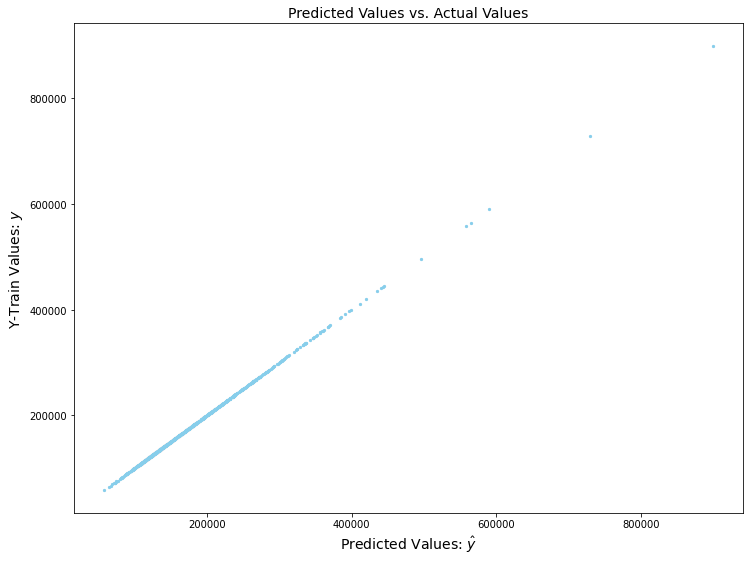

In [46]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y_train, s=5, color='skyblue')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 14)
plt.ylabel("Y-Train Values: $y$", fontsize = 14)
plt.title('Predicted Values vs. Actual Values', fontsize = 14);

# I would call this questionably linear? Need to explore further.

# Code adapted from Ga DSI 3.01 Linear Regression

### Generate Model Summary:

In [247]:
# Create and fit model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              4309.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        20:42:26   Log-Likelihood:                         -24197.
No. Observations:                2049   AIC:                                  4.843e+04
Df Residuals:                    2032   BIC:                                  4.852e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sq Ft Total        46.9789      1.427     32.925      0.000      44.181      49.777
Overall Qual     9179.7677    948.625      9.677      0.000    7319.388     1.1e+04
Lot Frontage      181.9294     36.923      4.927      0.000     109.518     254.341
Age at Sale       202.6452    548.237      0.370      0.712    -872.520    1277.811
Home Age         -492.0899    548.513     -0.897      0.370   -1567.797     583.617
Yrs Since Remod  -390.7945     46.967     -8.321      0.000    -482.902    -298.687
Has Fence         762.2670   1929.751      0.395      0.693   -3022.230    4546.764
Has Wood Deck    1459.3358   1570.880      0.929      0.353   -1621.367    4540.038
Has Masonry      2978.3670   1687.751      1.765      0.078    -331.535    6288.269
Has Fireplace    1.498e+04   1669.216      8.975      0.000    1.17e+04    1.83e+04
Has Garage      -8212.1634   3222.052     -2.549      0.011   -1.45e+04   -1893.293
Has Pool         7033.1965   1.17e+04      0.599      0.549    -1.6e+04    3.01e+04
Exter Qual       8928.1860   2106.053      4.239      0.000    4797.938    1.31e+04
Exter Cond      -5575.5911   1854.000     -3.007      0.003   -9211.531   -1939.652
Bsmt Cond       -1.605e+04   1971.415     -8.142      0.000   -1.99e+04   -1.22e+04
Bsmt Qual        3761.6315   1590.459      2.365      0.018     642.532    6880.731
Kitchen Qual     1.037e+04   1733.849      5.983      0.000    6973.810    1.38e+04
==============================================================================
Omnibus:                      645.584   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4469.135
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       9.751   Cond. No.                     4.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# The satsmodels output has a much higher R2.
# The coefficients are interpretable but the R2 gives me pause.

### Send Predictions to CSV:

In [212]:
# Create columns of Ids and the baseline_array
predict = pd.concat([df_test.loc[:, 'Id'], y_pred], axis=1)
predict.columns = ['Id', 'SalePrice']
predict.to_csv('../predictions/ers_predict_04.csv', index=None)

In [213]:
predict.head()

,Id,SalePrice
0,2658,123470.282855
1,2718,197012.171442
2,2414,194560.795940
3,1989,118322.741640
4,625,164601.803750
